<h1 align="center">Clustering</h1><br>
Clustering is the task of dividing the population or data points into a number of groups (Clusters) such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

<img src="images/Clustering example.jpg">

<h3>Clustering Approaches :</h3>
<ul>
    <li>Hierarchical Clustering:
        <ul>
            <li>Agglomerative Clustering (Bottom-Up)
            <li>Divisive Clustering (Up-Bottom)
        </ul>
    <li>Model-Based Clustering:
        <ul>
            <li> EM
            <li> GMM
        </ul>
    <li>Partial Competitive Clustering:
        <ul>
            <li> K-Means
            <li> K-Means++
            <li> Batch K-Means
            <li> K-Medoids "Partitioning around medoids(PAM)"
            <li> Neural Gas
            <li> Self-Organizing Maps (SOM)
        </ul>
    <li>Density-Based Clustering:
        <ul>
            <li> DBSCAN (Density-Based Spatial Clustering Of Applications With Noise)
        </ul>
    <li>Graph-Based Clustering:
        <ul>
            <li> POBOC (Pole-Based Overlapping Clustering)
        </ul>
</ul>

#### `Import needed libraries`

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn_som.som import SOM
import scipy.cluster.hierarchy as shc
sns.set()

In [56]:
df = pd.read_excel('data/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [67]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


#### Preprocessing the Data

In [68]:
# category data encoding
df_k = df[['Ship Mode','Quantity','Sales','Profit','Sub-Category','Category','Region']].copy()

#Sub-Category column
sub_cat = df_k['Sub-Category'].astype('category')
sub_cat_dict = dict(enumerate(sub_cat.cat.categories))

#Category column
category_cat = df_k['Category'].astype('category')
cat_dict = dict(enumerate(category_cat.cat.categories))

#Region column
region_cat = df_k['Region'].astype('category')
region_dict = dict(enumerate(region_cat.cat.categories))

# Ship Mode Column 
ship_cat = df_k['Ship Mode'].astype('category')
ship_dict = dict(enumerate(ship_cat.cat.categories))

print('Sub-Category :', sub_cat_dict, '\n\n', 'Category :', cat_dict, '\n\n',
      'Region :', region_dict, '\n\n', 'Ship Mode :', ship_dict)

Sub-Category : {0: 'Accessories', 1: 'Appliances', 2: 'Art', 3: 'Binders', 4: 'Bookcases', 5: 'Chairs', 6: 'Copiers', 7: 'Envelopes', 8: 'Fasteners', 9: 'Furnishings', 10: 'Labels', 11: 'Machines', 12: 'Paper', 13: 'Phones', 14: 'Storage', 15: 'Supplies', 16: 'Tables'} 

 Category : {0: 'Furniture', 1: 'Office Supplies', 2: 'Technology'} 

 Region : {0: 'Central', 1: 'East', 2: 'South', 3: 'West'} 

 Ship Mode : {0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}


In [69]:
# reverse the dictionaries for mapping  
sub_map = {v: k for k, v in sub_cat_dict.items()}
cat_map = {v: k for k, v in cat_dict.items()}
region_map = {v: k for k, v in region_dict.items()}
ship_map = {v: k for k, v in ship_dict.items()}
# mapping
df_k = df_k.replace({'Ship Mode':ship_map,'Region':region_map,'Category':cat_map,'Sub-Category':sub_map})
df_k

,Ship Mode,Quantity,Sales,Profit,Sub-Category,Category,Region
0,2,2,261.9600,41.9136,4,0,2
1,2,3,731.9400,219.5820,5,0,2
2,2,2,14.6200,6.8714,10,1,3
3,3,5,957.5775,-383.0310,16,0,2
4,3,2,22.3680,2.5164,14,1,2
...,...,...,...,...,...,...,...
9989,2,3,25.2480,4.1028,9,0,2
9990,3,2,91.9600,15.6332,9,0,3
9991,3,2,258.5760,19.3932,13,2,3
9992,3,4,29.6000,13.3200,12,1,3


In [71]:
# Scaling the data
x_scaled = scale(df_k)

## Hierarchical clustering

In hierarchical clustering, a tree or hierarchy of clusters is incrementally built. Assuming that the data objects are the leaves of the hierarchical tree, the hierarchical tree is build using two basic approaches:
- Agglomerative (bottom-up) 
- Divisive (top-down).

#### `Agglomerative Clustering (Bottom-Up)`
Agglomerative methods build the hierarchy tree in a bottom-up manner, starting at the bottom hierarchy level (each object composes a singleton cluster) and successively merging clusters until a unique cluster is found at the top level.
<br><br><img src="agg.jpg"></img>

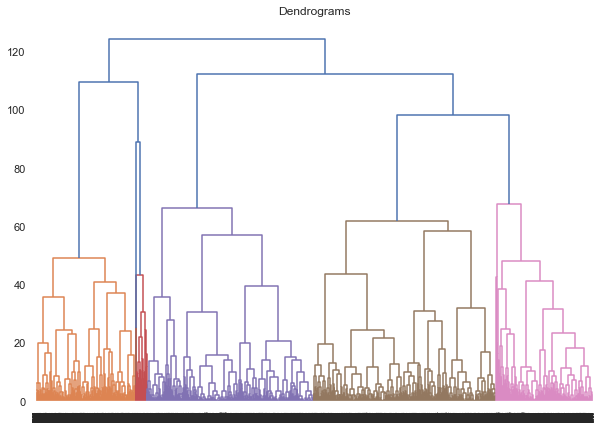

In [72]:
# 1) Ward linkage
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_scaled, method='ward'))

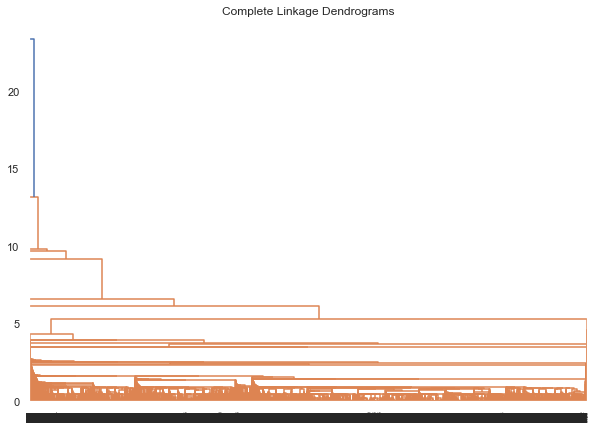

In [73]:
# 2) Single linkage
plt.figure(figsize=(10, 7))
plt.title('Complete Linkage Dendrograms') 
dend = shc.dendrogram(shc.linkage(x_scaled, method='single'))

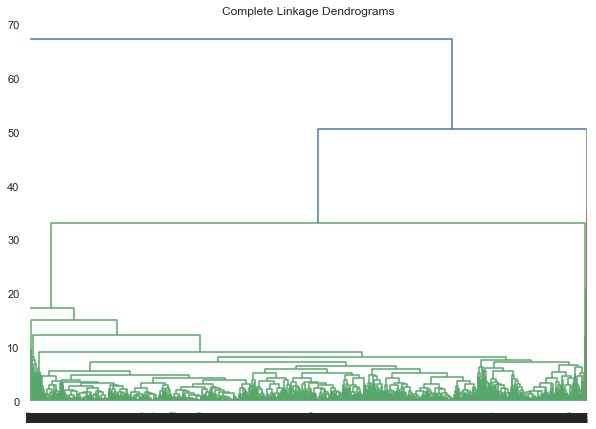

In [74]:
# 3) Complete linkage
plt.figure(figsize=(10, 7))
plt.title('Complete Linkage Dendrograms') 
dend = shc.dendrogram(shc.linkage(x_scaled, method='complete'))

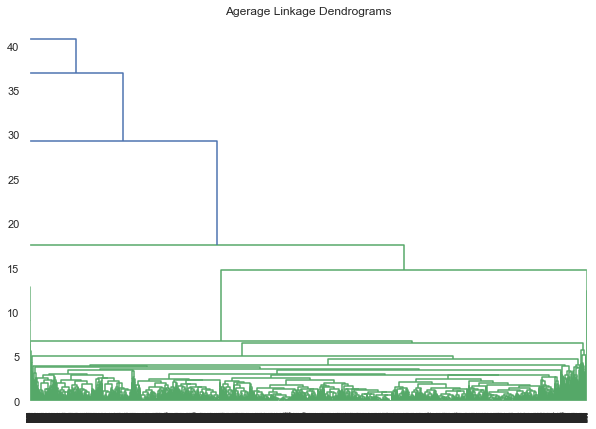

In [75]:
# 4) Agerage linkage
plt.figure(figsize=(10, 7))  
plt.title('Agerage Linkage Dendrograms') 
dend = shc.dendrogram(shc.linkage(x_scaled, method='average'))

In [150]:
# lets visualize using wrad linkage, and only 5 clusters
cluster = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')

cluster.fit(df_k)
df['agg_labels'] = cluster.labels_

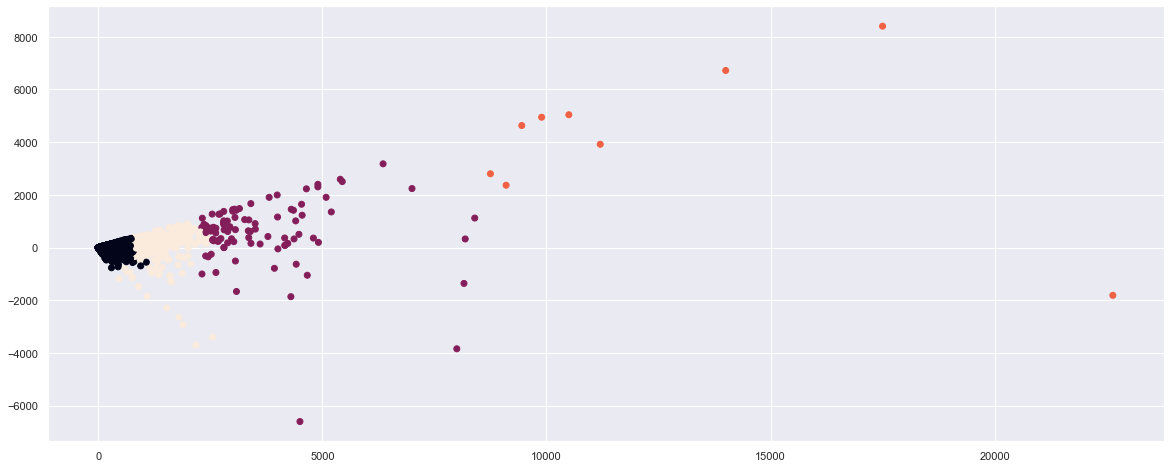

In [151]:
plt.figure(figsize=(20, 8))
plt.scatter(x=df['Sales'], y=df['Profit'], c=df['agg_labels'])
plt.show()

In [152]:
# Calculate Silhoutte Score
score = silhouette_score(df_k, df['agg_labels'], metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.808


#### `Divisive Clustering (Up-Bottom)`
Divisive methods build the hierarchy in a up-bottom manner. Divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

#### Pros and Cons of Hierarchical Clustering
1. We need not to specify the number of clusters required for the algorithm.

2. It doesn’t work well on the large dataset. It is generally applicable to the smaller data. If you have a large dataset, it can become difficult to determine the correct number of clusters by the dendrogram.

3. In comparison to K-means, hierarchical clustering is computationally heavy and takes longer time to run.

### `Heatmaps and Dendrograms`

C:\Users\Alaa Sedeeq\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


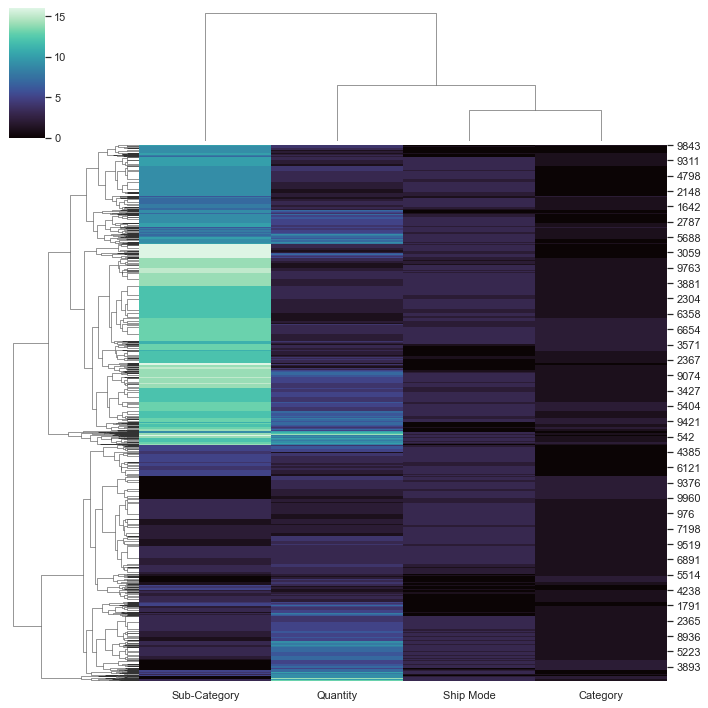

In [103]:
sns.clustermap(df_k[['Ship Mode','Quantity','Sub-Category','Category']], cmap='mako');

## Partial Competitive Clustering

### `KMeans: `<br>

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :
- Specify the desired number of clusters K.
- Randomly assign each data point to a cluster.
- Compute cluster centroids.
- Re-assign each point to the closest cluster centroid.
- Re-compute cluster centroids.

**We need to achieve:**
- Minimum distance between points in a cluster.
- Maximum distance between clusters (Centroids).

In [86]:
# Apply the elbow method to choose the optimal number of clusters
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

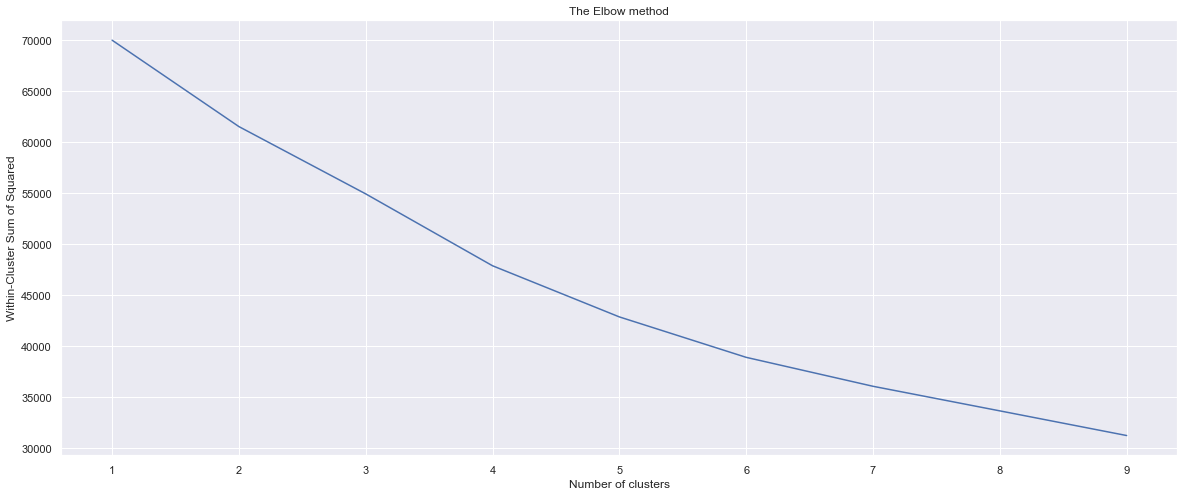

In [81]:
plt.figure(figsize=(20, 8))
plt.plot(range(1, 10, 1), WCSS)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squared');

In [93]:
### Now let's apply K-Means with (k=6)

kmeans = MiniBatchKMeans(n_clusters=6)

df['kmeans_labels'] = kmeans.fit_predict(df_k)

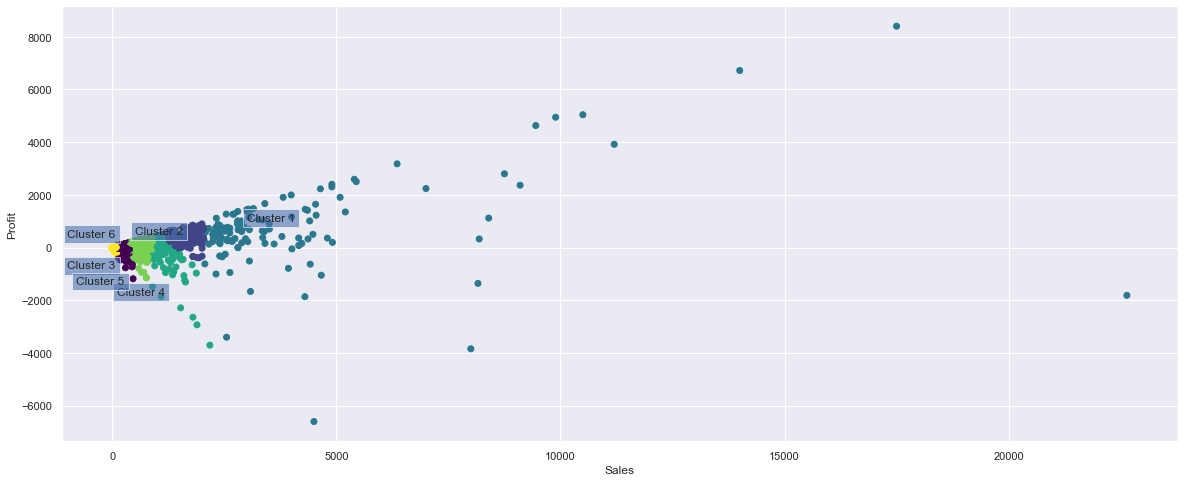

In [144]:
plt.figure(figsize=(20, 8))
plt.scatter(df['Sales'], df['Profit'], c=df['kmeans_labels'], cmap='viridis');
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.text(3000, 1000, 'Cluster 1', bbox=dict( alpha=0.6)), plt.text(500, 500, 'Cluster 2', bbox=dict( alpha=0.6))
plt.text(-1000, -800, 'Cluster 3', bbox=dict( alpha=0.6)), plt.text(100, -1800, 'Cluster 4', bbox=dict( alpha=0.6))
plt.text(-800, -1400, 'Cluster 5', bbox=dict( alpha=0.6)), plt.text(-1000, 400, 'Cluster 6', bbox=dict( alpha=0.6));

In [147]:
# Calculate Silhoutte Score
score = silhouette_score(df_k, df['kmeans_labels'], metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.584


### `Silhouette analysis for KMeans clustering`

For n_clusters = 4 The average silhouette_score is : 0.7862289761654261
For n_clusters = 5 The average silhouette_score is : 0.7831499417176844
For n_clusters = 6 The average silhouette_score is : 0.7209247459773481
For n_clusters = 7 The average silhouette_score is : 0.7287957795406013


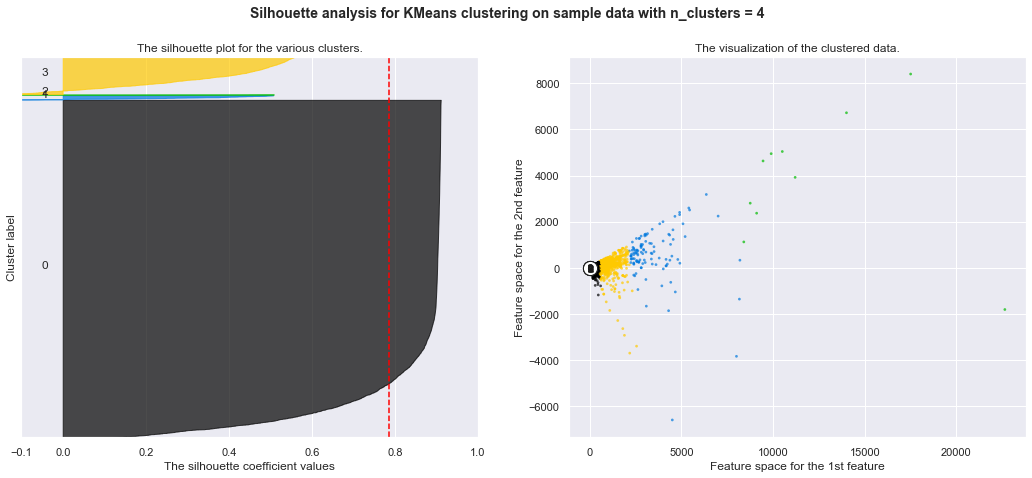

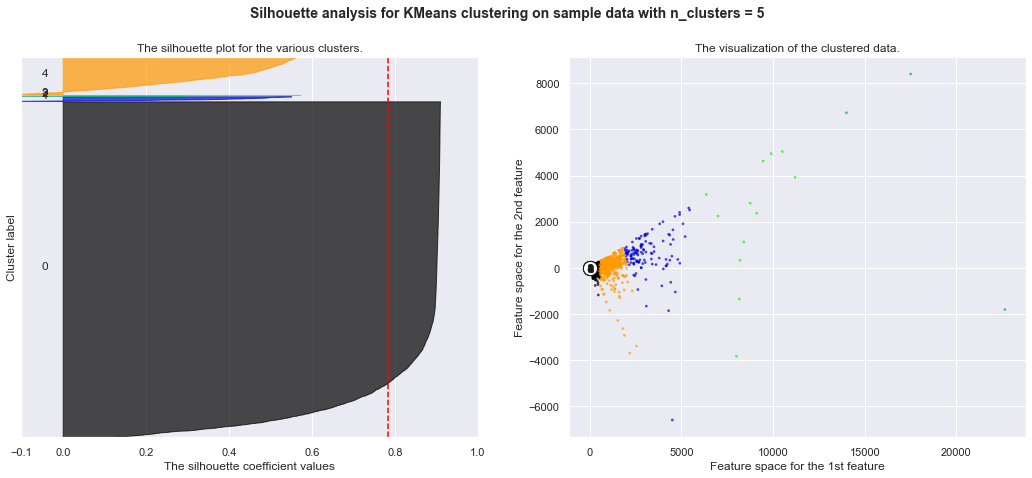

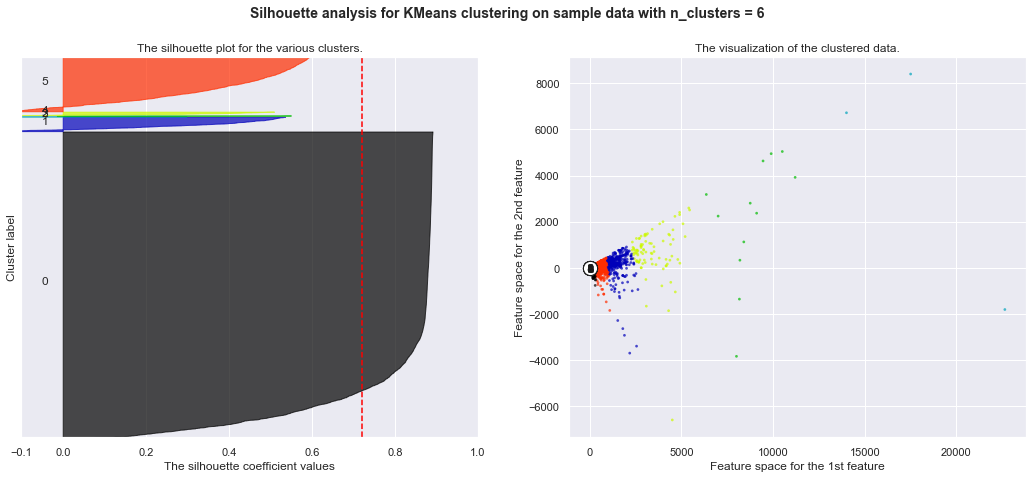

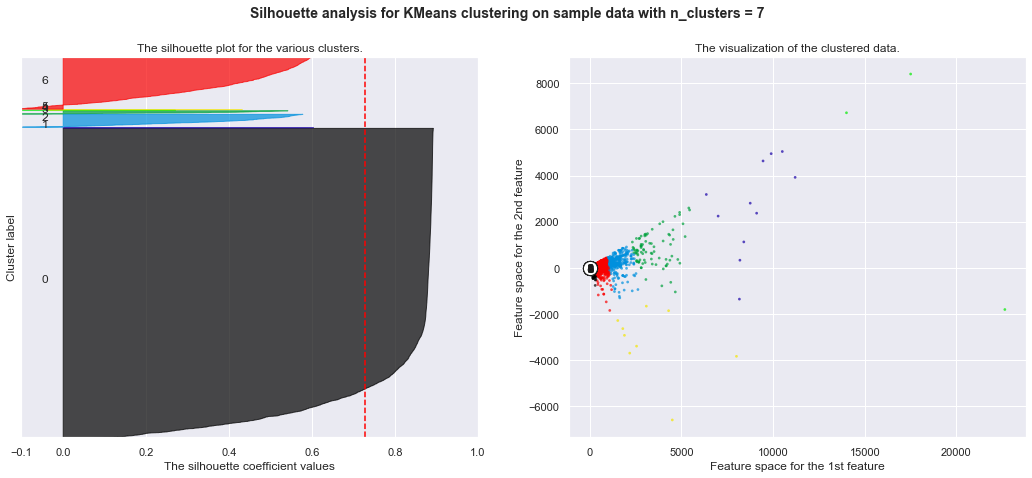

In [155]:
for n_clusters in [4,5,6,7]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_k) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_k)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_k, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_k, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df['Sales'], df['Profit'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### `SOM`

In [109]:
# Build a 3x1 SOM (3 clusters)
som = SOM(m=6, n=1, dim=7)

# Fit it to the data
som.fit(df_k.values)

# Assign each datapoint to its predicted cluster
df['som_labels'] = som.predict(df_k.values)

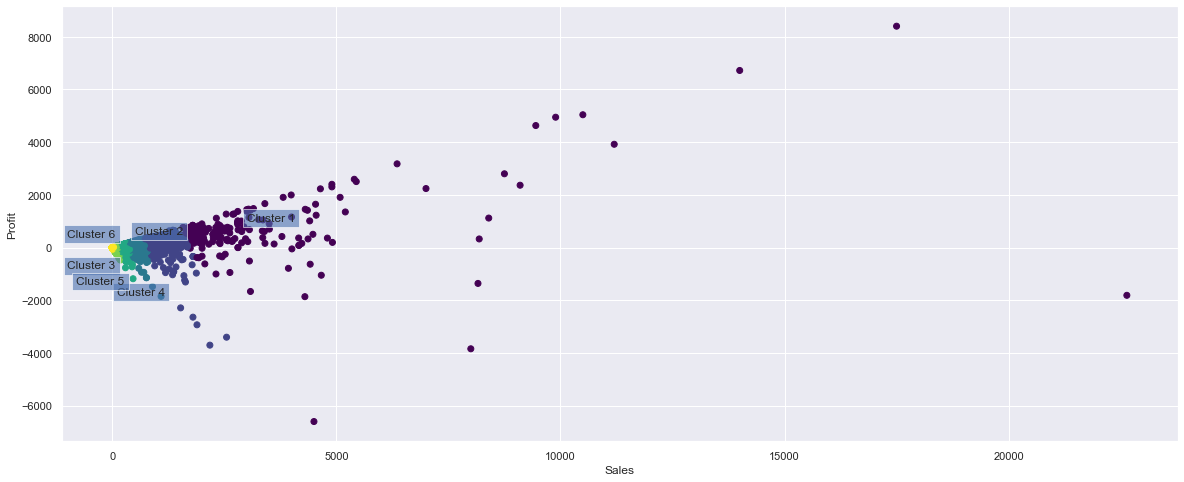

In [143]:
plt.figure(figsize=(20, 8))
plt.scatter(df['Sales'], df['Profit'], c=df['som_labels'], cmap='viridis');
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.text(3000, 1000, 'Cluster 1', bbox=dict( alpha=0.6)), plt.text(500, 500, 'Cluster 2', bbox=dict( alpha=0.6))
plt.text(-1000, -800, 'Cluster 3', bbox=dict( alpha=0.6)), plt.text(100, -1800, 'Cluster 4', bbox=dict( alpha=0.6))
plt.text(-800, -1400, 'Cluster 5', bbox=dict( alpha=0.6)), plt.text(-1000, 400, 'Cluster 6', bbox=dict( alpha=0.6));

In [145]:
# Calculate Silhoutte Score
score = silhouette_score(df_k, df['som_labels'], metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.496
